
# Group project


###### Group members: 

- Fajartri Anggoro
- Mohammad Hadi Alipour Motlagh
- Jeanne Harling


### Importing libraries and data

In [2]:
# Import libraries
library(data.table)  # Data manipulate
library(mlr)         # ML toolkit
library(caret)       # ML toolkit
library(ggplot2)     # Visualization
library(plotrix)     # Draw circle
library(rgl)         # 3D plots
library(tidyverse)
if(!require("tracerer")) install.packages("tracerer"); library("tracerer")
library(ggplot2)
if(!require("corrplot")) install.packages("corrplot"); library("corrplot")
if(!require("DataExplorer")) install.packages("DataExplorer"); library("DataExplorer")
library(randomForest)
library(tree)
library(e1071)  
library(MASS)
if(!require("ROCR")) install.packages("ROCR"); library("ROCR")
if(!require("Hmisc")) install.packages("Hmisc"); library("Hmisc")
if(!require("correlation")) install.packages("correlation"); library("correlation")

Loading required package: tracerer

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'tracerer'"
also installing the dependency 'testit'




package 'testit' successfully unpacked and MD5 sums checked
package 'tracerer' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\malipourmotlagh1\AppData\Local\Temp\RtmpSg26Ci\downloaded_packages


Loading required package: corrplot

corrplot 0.92 loaded

Loading required package: DataExplorer

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'DataExplorer'"
also installing the dependency 'networkD3'




package 'networkD3' successfully unpacked and MD5 sums checked
package 'DataExplorer' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\malipourmotlagh1\AppData\Local\Temp\RtmpSg26Ci\downloaded_packages


randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:dplyr':

    combine


The following object is masked from 'package:ggplot2':

    margin


Registered S3 method overwritten by 'tree':
  method     from
  print.tree cli 


Attaching package: 'e1071'


The following object is masked from 'package:mlr':

    impute



Attaching package: 'MASS'


The following object is masked from 'package:dplyr':

    select


Loading required package: ROCR


Attaching package: 'ROCR'


The following object is masked from 'package:mlr':

    performance


Loading required package: Hmisc

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'Hmisc'"
also installing the dependencies 'Formula', 'htmlTable', 'viridis'




package 'Formula' successfully unpacked and MD5 sums checked
package 'htmlTable' successfully unpacked and MD5 sums checked
package 'viridis' successfully unpacked and MD5 sums checked
package 'Hmisc' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\malipourmotlagh1\AppData\Local\Temp\RtmpSg26Ci\downloaded_packages


Loading required package: survival


Attaching package: 'survival'


The following object is masked from 'package:caret':

    cluster


Loading required package: Formula


Attaching package: 'Hmisc'


The following object is masked from 'package:e1071':

    impute


The following objects are masked from 'package:dplyr':

    src, summarize


The following object is masked from 'package:mlr':

    impute


The following objects are masked from 'package:base':

    format.pval, units


Loading required package: correlation

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'correlation'"
also installing the dependencies 'bayestestR', 'datawizard', 'parameters'




package 'bayestestR' successfully unpacked and MD5 sums checked
package 'datawizard' successfully unpacked and MD5 sums checked
package 'parameters' successfully unpacked and MD5 sums checked
package 'correlation' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\malipourmotlagh1\AppData\Local\Temp\RtmpSg26Ci\downloaded_packages


In [114]:
# Importing datasets

train <- read.csv("../Data/bank_mkt_train.csv")


In [192]:
test <- read.csv("../Data/bank_mkt_test.csv")

In [193]:
str(test)

'data.frame':	10000 obs. of  20 variables:
 $ client_id     : int  2986 29710 38938 31313 24173 14426 40159 12301 9640 19742 ...
 $ age           : int  53 32 70 46 35 24 33 38 37 36 ...
 $ job           : chr  "technician" "blue-collar" "retired" "services" ...
 $ marital       : chr  "single" "married" "married" "married" ...
 $ education     : chr  "professional.course" "basic.6y" "high.school" "high.school" ...
 $ default       : chr  "no" "no" "no" "no" ...
 $ housing       : chr  "no" "yes" "yes" "no" ...
 $ loan          : chr  "no" "no" "no" "no" ...
 $ contact       : chr  "cellular" "telephone" "cellular" "cellular" ...
 $ month         : chr  "jul" "jul" "aug" "apr" ...
 $ day_of_week   : chr  "tue" "wed" "tue" "mon" ...
 $ campaign      : int  1 2 1 1 1 2 3 18 5 1 ...
 $ pdays         : int  999 999 999 999 999 6 999 999 999 3 ...
 $ previous      : int  0 0 0 1 1 2 0 0 0 1 ...
 $ poutcome      : chr  "nonexistent" "nonexistent" "nonexistent" "failure" ...
 $ emp.var.rate  

In [194]:
unique(test$default)

[1] "no"      "unknown" NA

In [116]:
# Checking how the table looks like 
# We have 20k rows and 21  variables
train

client_id,age,job,marital,education,default,housing,loan,contact,month,⋯,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe
<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
29925,42,management,married,basic.9y,no,no,no,cellular,jul,⋯,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0
37529,35,unemployed,married,university.degree,no,yes,no,telephone,jun,⋯,4,999,0,nonexistent,1.4,94.465,-41.8,4.960,5228.1,0
2757,44,technician,married,basic.9y,no,yes,yes,cellular,may,⋯,1,999,0,nonexistent,-1.8,92.893,-46.2,1.264,5099.1,0
9642,45,services,married,high.school,no,yes,no,cellular,apr,⋯,1,999,0,nonexistent,-1.8,93.075,-47.1,1.453,5099.1,0
14183,45,unknown,married,unknown,unknown,unknown,unknown,telephone,may,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0
15180,38,technician,married,professional.course,no,no,no,telephone,may,⋯,2,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,0
27168,33,technician,married,professional.course,no,no,yes,cellular,apr,⋯,1,NA,1,failure,-1.8,93.075,-47.1,1.405,5099.1,1
9097,38,blue-collar,single,basic.9y,unknown,yes,no,telephone,may,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
30538,29,blue-collar,single,unknown,no,yes,no,cellular,may,⋯,1,999,1,failure,-1.8,92.893,-46.2,1.250,5099.1,0



### Cleaning Train Table

In [117]:
# Sum of missing values in train bank marketing data set
sum(is.na(train))

[1] 3664

In [118]:
# Missing values per variable in train
missing_values <- sapply(train, function(x) sum(is.na(x)))
missing_values

client_id            age            job        marital      education 
             0            202            161            199            170 
       default        housing           loan        contact          month 
           214            195            219            217            199 
   day_of_week       campaign          pdays       previous       poutcome 
           185            203            185            209            175 
  emp.var.rate cons.price.idx  cons.conf.idx      euribor3m    nr.employed 
           165            181            197            204            184 
     subscribe 
             0


As our missing data represent only a maximum of 1% of the total observation in each variable, it is possible to drop them. In order to check if our dropping idea was right we will check how many observations has been deleted in total. If the dropping will result in more than 10% lose of observations then we will keep and replace the missing values.

In [119]:
# Dropping all na

traindrop <- train %>% drop_na()
nrow(traindrop)

[1] 16633


We can see that this technique would lead to a huge lose of data, more than 16% of our total observations. We will then keep and replace our missing data.  
- With a new category 'other' for categorical data unless this category already exists
- With a new category 'other' for logical data (as missing data represents less than 5% of observations)
- With the median or mean for numerical values

We will need to create indicators variable for numerical to track the missing data as it can be correlated to our target as well. We will also need to process with the same cleaning steps for both train and test data. 


 #### 1. Categorical data 
It represents job, marital status, education, contact, month, day_of_week and poutcome

In [120]:
# Replacing NA for categorical data

# NA for job: As an 'unknown' category already exists then we replace the missing value with it
train$job = train$job %>% replace_na('unknown')

# NA for marital status: As an 'unknown' category already exists then we replace the missing value with it
train$marital = train$marital %>% replace_na('unknown')

# NA for education: As an 'unknown' category already exists then we replace the missing value with it
train$education = train$education %>% replace_na('unknown')

# NA for contact: As 'unknown' category doesn't exist yet we create it
train$contact = train$contact %>% replace_na('unknown')

# NA for month: As 'unknown' category doesn't exist yet we create it
train$month = train$month %>% replace_na('unknown')

# NA for day_of_week: As 'unknown' category doesn't exist yet we create it
train$day_of_week = train$day_of_week %>% replace_na('unknown')

# NA for poutcome: As an 'nonexistent' category already exists then we replace the missing value with it
train$poutcome = train$poutcome %>% replace_na('nonexistent')


#### 2. Logical data
It represents default, housing, loan and subscribe (target)

In [121]:
# Dealing with NA for logical data

# NA for default: As an 'unknown' category already exists then we replace the missing value with it
train$default = train$default %>% replace_na('unknown')

# NA for housing: As an 'unknown' category already exists then we replace the missing value with it
train$housing= train$housing %>% replace_na('unknown')

# NA for loan: As an 'unknown' category already exists then we replace the missing value with it
train$loan = train$loan %>% replace_na('unknown')

# Subscribe doesn't have any missing value


#### 3. Numerical data 

*For numerical data we need to create indicators to track the imputation*

- age will be replaced by the median
- campaign: the higher the better, it is not categorical
- Pdays: replacing 999 by zero and creating a new variable (or checking how many zeros first)
- previous: replacing by the median
- emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed will be replaced by the mean

In [122]:
# We will replace age by the median
# -> we can also create categorical variable for the age depending of our model result

# First step: creating a new variable 
train$missing_age <- ifelse(is.na(train$age) == TRUE, 1, 0)

# Second step: replacing by the median
train$age[is.na(train$age)]<-mean(train$age,na.rm=TRUE)

In [123]:
# For campaign variable

# We create a new 'campaign_missing' variable: 1 for missing and 0 otherwise
train$missing_campaign <- ifelse(is.na(train$campaign) == TRUE, 1, 0)

# We will replace campaign missing value by the median 
train$campaign[is.na(train$campaign)]<-mean(train$campaign,na.rm=TRUE)

In [124]:
# Checking if it was correctly assign 
#checkingmissing = train[,c('campaign','missing_campaign')]
#checkingmissing[order(checkingmissing$campaign),]

In [125]:
# Checking how many people with 0. 
#We do not have a lot of data in zero, we can assign a 1 instead of 0 for these clients
# -> We can also assign categorical variable instead of numerical later on
as.data.frame(table(train$pdays))

Var1,Freq
<fct>,<int>
0,8
1,9
2,30
3,221
4,62
5,21
6,209
7,28
8,11


In [126]:
# For pdays variable

# First we replace pdays 0 values with 1 (the difference in days for 0 and 1 is not huge)
train["pdays"][train["pdays"] == 0] <- 1

# We create a new indicator variable for '999' to track the replacement
train$replace999 <- ifelse(train$pdays == 999, 1, 0)
train$replace999 <- ifelse(is.na(train$replace999) == TRUE, 1, 0)

# We replace pdays 999 values with zero (So the zero is more significant for people without contact)
train["pdays"][train["pdays"] == 999] <- 0

# We track the NA values as a new variable
train$missing_pdays <- ifelse(is.na(train$pdays) == TRUE, 1, 0)

# We can finally replace the NA values by zero 
train$pdays = train$pdays %>% replace_na(0)

In [127]:
train

client_id,age,job,marital,education,default,housing,loan,contact,month,⋯,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe,missing_age,missing_campaign,replace999,missing_pdays
<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
29925,42,management,married,basic.9y,no,no,no,cellular,jul,⋯,1.4,93.918,-42.7,4.968,5228.1,0,0,0,0,0
37529,35,unemployed,married,university.degree,no,yes,no,telephone,jun,⋯,1.4,94.465,-41.8,4.960,5228.1,0,0,0,0,0
2757,44,technician,married,basic.9y,no,yes,yes,cellular,may,⋯,-1.8,92.893,-46.2,1.264,5099.1,0,0,0,0,0
9642,45,services,married,high.school,no,yes,no,cellular,apr,⋯,-1.8,93.075,-47.1,1.453,5099.1,0,0,0,0,0
14183,45,unknown,married,unknown,unknown,unknown,unknown,telephone,may,⋯,1.1,93.994,-36.4,4.859,5191.0,0,0,0,0,0
15180,38,technician,married,professional.course,no,no,no,telephone,may,⋯,1.1,93.994,-36.4,4.858,5191.0,0,0,0,0,0
27168,33,technician,married,professional.course,no,no,yes,cellular,apr,⋯,-1.8,93.075,-47.1,1.405,5099.1,1,0,0,1,1
9097,38,blue-collar,single,basic.9y,unknown,yes,no,telephone,may,⋯,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0
30538,29,blue-collar,single,unknown,no,yes,no,cellular,may,⋯,-1.8,92.893,-46.2,1.250,5099.1,0,0,0,0,0


In [128]:
# For previous variable

# We count the unique values frequency first
as.data.frame(table(train$previous))

Var1,Freq
<fct>,<int>
0,17120
1,2152
2,371
3,103
4,31
5,12
6,2


In [129]:
# We can either replace missing values by the median + tracking missing or creating categorical variables with a new category
# -> We will first try by assigning the median and tracking the missing data, we can improve this later for the modelling

# First step: new variable 
train$missing_previous <- ifelse(is.na(train$previous) == TRUE, 1, 0)

# Second step: replacing NA
train$previous[is.na(train$previous)]<-median(train$previous,na.rm=TRUE)

In [130]:
# Finally, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed will be replaced by the mean

# First step: new variables 
train$missing_emp.var.rate <- ifelse(is.na(train$emp.var.rate) == TRUE, 1, 0)
train$missing_cons.price.idx <- ifelse(is.na(train$cons.price.idx) == TRUE, 1, 0)
train$missing_cons.conf.idx <- ifelse(is.na(train$cons.conf.idx) == TRUE, 1, 0)
train$missing_euribor3m <- ifelse(is.na(train$euribor3m) == TRUE, 1, 0)
train$missing_nr.employed <- ifelse(is.na(train$nr.employed) == TRUE, 1, 0)

# Second step: replacing NA
train$emp.var.rate[is.na(train$emp.var.rate)]<-mean(train$emp.var.rate,na.rm=TRUE)
train$cons.price.idx[is.na(train$cons.price.idx)]<-mean(train$cons.price.idx,na.rm=TRUE)
train$cons.conf.idx[is.na(train$cons.conf.idx)]<-mean(train$cons.conf.idx,na.rm=TRUE)
train$euribor3m[is.na(train$euribor3m)]<-mean(train$euribor3m,na.rm=TRUE)
train$nr.employed[is.na(train$nr.employed)]<-mean(train$nr.employed,na.rm=TRUE)

In [131]:
# Checking missing values per variables in train
missing_values <- sapply(train, function(x) sum(is.na(x)))
missing_values

client_id                    age                    job 
                     0                      0                      0 
               marital              education                default 
                     0                      0                      0 
               housing                   loan                contact 
                     0                      0                      0 
                 month            day_of_week               campaign 
                     0                      0                      0 
                 pdays               previous               poutcome 
                     0                      0                      0 
          emp.var.rate         cons.price.idx          cons.conf.idx 
                     0                      0                      0 
             euribor3m            nr.employed              subscribe 
                     0                      0                      0 
           missing_age       missing_campaign             replace999 
                     0                      0                      0 
         missing_pdays       missing_previous   missing_emp.var.rate 
                     0                      0                      0 
missing_cons.price.idx  missing_cons.conf.idx      missing_euribor3m 
                     0                      0                      0 
   missing_nr.employed 
                     0

In [132]:
# See final train table 

str(train)

'data.frame':	20000 obs. of  31 variables:
 $ client_id             : int  29925 37529 2757 9642 14183 15180 27168 9097 30538 28981 ...
 $ age                   : num  42 35 44 45 45 38 33 38 29 34 ...
 $ job                   : chr  "management" "unemployed" "technician" "services" ...
 $ marital               : chr  "married" "married" "married" "married" ...
 $ education             : chr  "basic.9y" "university.degree" "basic.9y" "high.school" ...
 $ default               : chr  "no" "no" "no" "no" ...
 $ housing               : chr  "no" "yes" "yes" "yes" ...
 $ loan                  : chr  "no" "no" "yes" "no" ...
 $ contact               : chr  "cellular" "telephone" "cellular" "cellular" ...
 $ month                 : chr  "jul" "jun" "may" "apr" ...
 $ day_of_week           : chr  "thu" "mon" "mon" "tue" ...
 $ campaign              : num  1 4 1 1 1 2 1 1 1 1 ...
 $ pdays                 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ previous              : int  0 0 0 0 0 0 1 0 1 0 ...
 $ 


## Correlation Matrix

In [133]:
# Creating an atrain dataset for the analysis without the 'missing track variables' and without client_id
atrain = subset(train, select=-c(client_id, missing_age, missing_campaign, replace999, missing_pdays, missing_previous, missing_emp.var.rate, missing_cons.price.idx, missing_cons.conf.idx, missing_euribor3m , missing_nr.employed))


##### Correlation Matrix

4 features with more than 5 categories ignored!
job: 12 categories
education: 8 categories
month: 11 categories
day_of_week: 6 categories




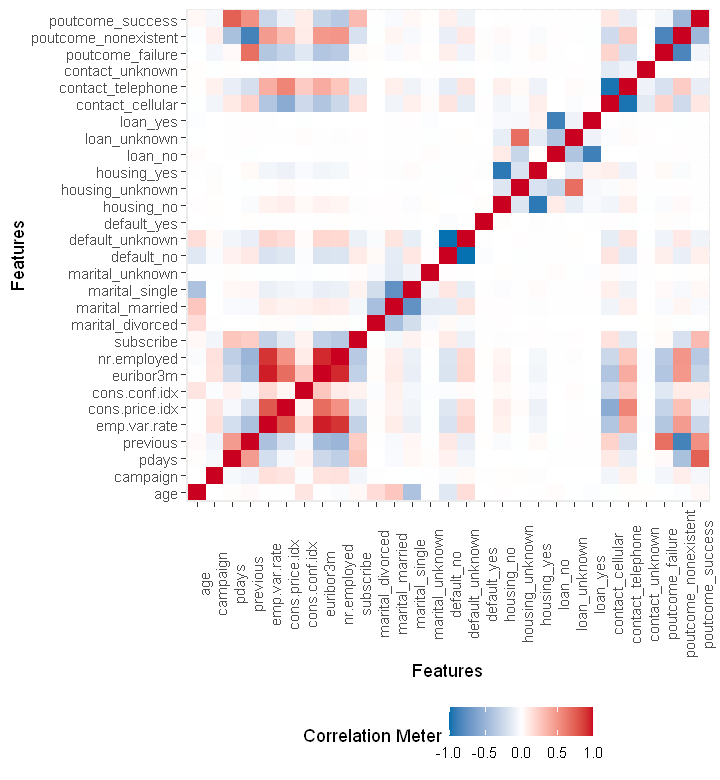

In [134]:
# Plotting correlation without job, education, month and day of the week

plot_correlation(na.omit(atrain), maxcat = 5L)

According to our main correlation matrix we can conclude that the most important variables are pdays, previous, loan and poutcome. We can also notice a negative correlation with campaign, emp_var_rate, cons_price_idx, eurib, employed, poutcome nonexistent, as well as contact telephone. 

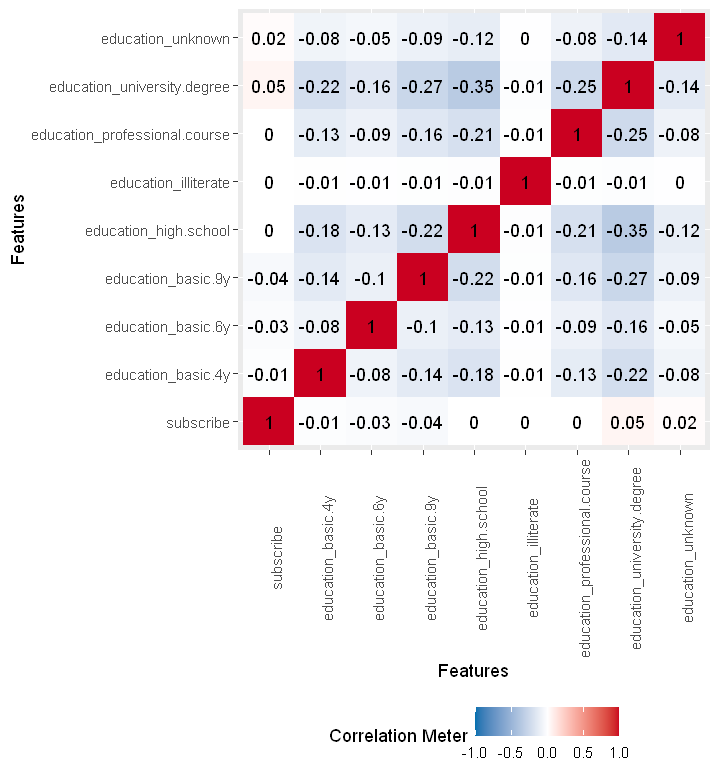

In [135]:
# Plotting correlation between subscribe and education

educationmat = atrain[,c("subscribe","education")]
plot_correlation(na.omit(educationmat), maxcat = 12L)

Only university degree can be correlated with subscribe

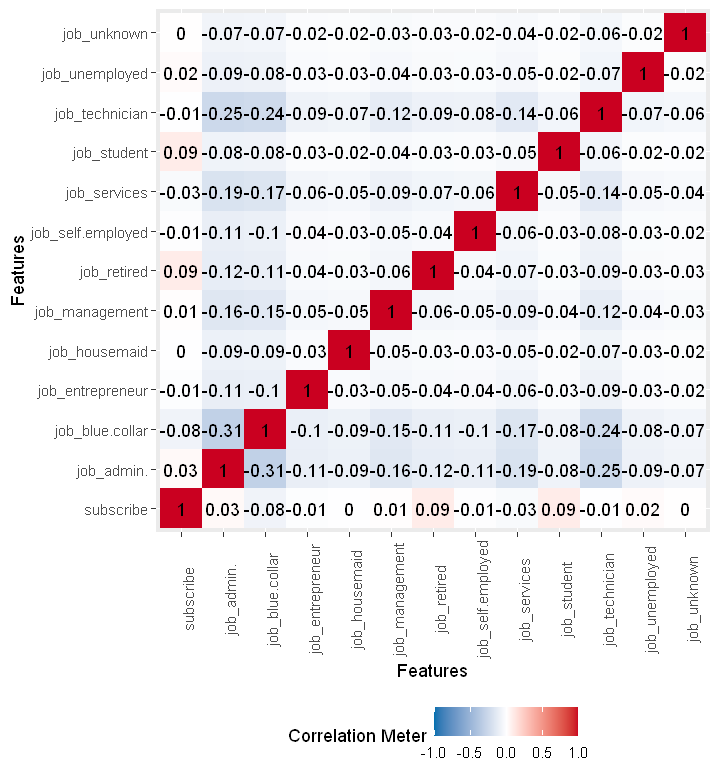

In [136]:
# Plotting correlation between subscribe and job

jobmat = atrain[,c("subscribe","job")]
plot_correlation(na.omit(jobmat), maxcat = 12L)


Some jobs can be related to subscribe

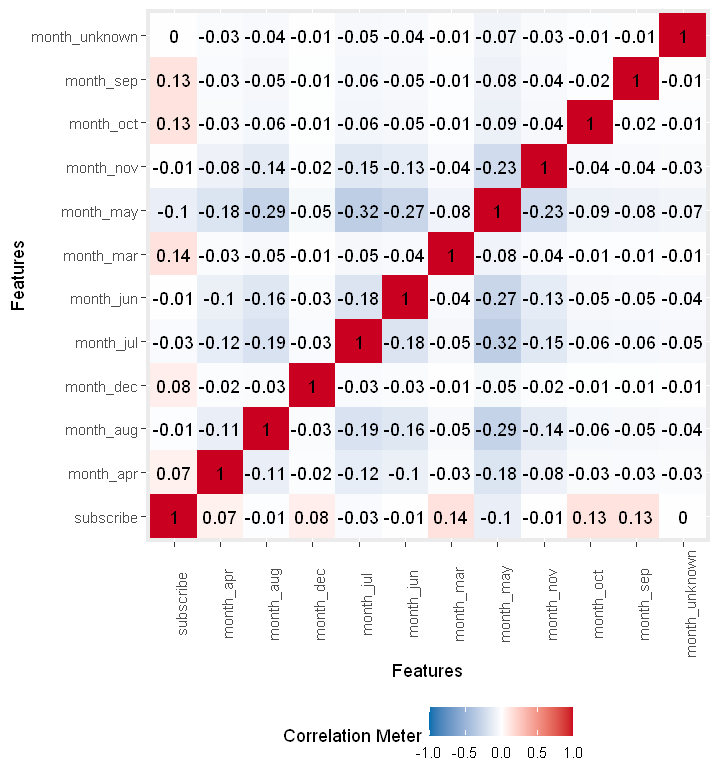

In [137]:
# Plotting correlation between subscribe and month

monthmat = atrain[,c("subscribe","month")]
plot_correlation(na.omit(monthmat), maxcat = 12L)


Month can be related to subscribe 

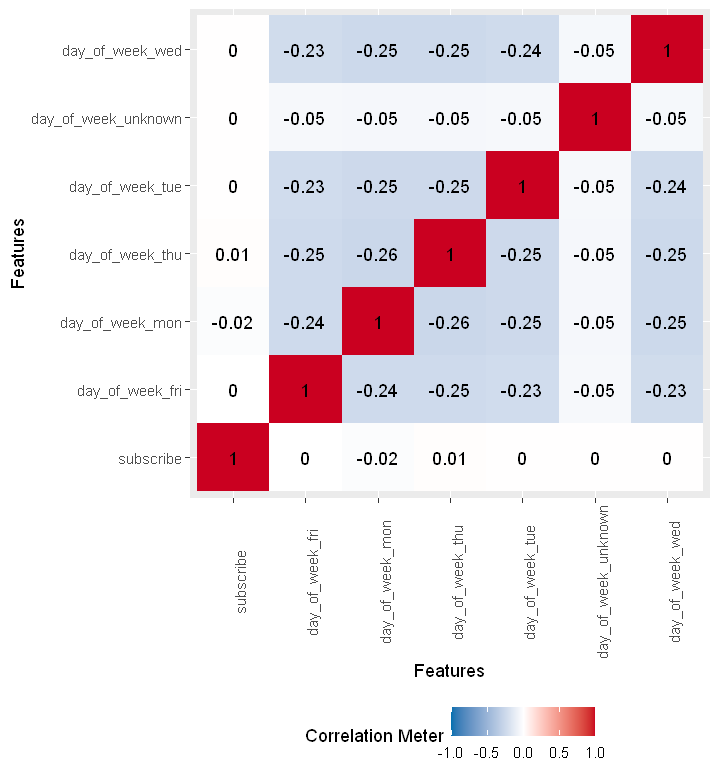

In [138]:
# Plotting correlation between subscribe and day

daymat = atrain[,c("subscribe","day_of_week")]
plot_correlation(na.omit(daymat), maxcat = 12L)


Day is not correlated at all with our target variable

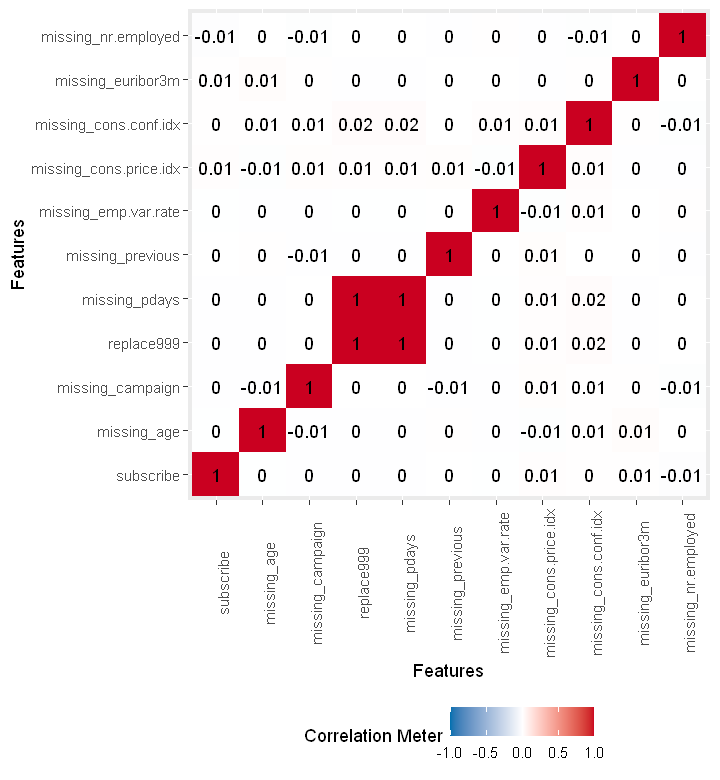

In [139]:
# Correlation with missing value from missing variables 

mtrain = train[,c("subscribe", "missing_age", "missing_campaign", "replace999", "missing_pdays", "missing_previous", "missing_emp.var.rate", "missing_cons.price.idx", "missing_cons.conf.idx", "missing_euribor3m" , "missing_nr.employed")]
plot_correlation(na.omit(mtrain), maxcat = 12L)


There is no correlation with subscribre and the missing or replacement tracker variables

In [140]:
# We can already remove the less important variables such as client_id, day, loan and trackers variables

train = subset(train, select=-c(client_id, loan, day_of_week, missing_age, missing_campaign, replace999, missing_pdays, missing_previous, missing_emp.var.rate, missing_cons.price.idx, missing_cons.conf.idx, missing_euribor3m , missing_nr.employed))


### Last steps before Modeling 

In [141]:
str(train)

'data.frame':	20000 obs. of  18 variables:
 $ age           : num  42 35 44 45 45 38 33 38 29 34 ...
 $ job           : chr  "management" "unemployed" "technician" "services" ...
 $ marital       : chr  "married" "married" "married" "married" ...
 $ education     : chr  "basic.9y" "university.degree" "basic.9y" "high.school" ...
 $ default       : chr  "no" "no" "no" "no" ...
 $ housing       : chr  "no" "yes" "yes" "yes" ...
 $ contact       : chr  "cellular" "telephone" "cellular" "cellular" ...
 $ month         : chr  "jul" "jun" "may" "apr" ...
 $ campaign      : num  1 4 1 1 1 2 1 1 1 1 ...
 $ pdays         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ previous      : int  0 0 0 0 0 0 1 0 1 0 ...
 $ poutcome      : chr  "nonexistent" "nonexistent" "nonexistent" "nonexistent" ...
 $ emp.var.rate  : num  1.4 1.4 -1.8 -1.8 1.1 1.1 -1.8 1.1 -1.8 1.4 ...
 $ cons.price.idx: num  93.9 94.5 92.9 93.1 94 ...
 $ cons.conf.idx : num  -42.7 -41.8 -46.2 -47.1 -36.4 -36.4 -47.1 -36.4 -46.2 -36.1 ...
 $ eur


#### 1. Replacing categorical string by numerical category


These variables are job, marital, education, default, housing, contact, month and poutcome 

In [142]:
# Jobs

# Replacing job category in numerical category

train["job"][train["job"] == "management"] <- 11
train["job"][train["job"] == "entrepreneur"] <- 10
train["job"][train["job"] == "admin."] <- 9
train["job"][train["job"] == "services"] <- 8
train["job"][train["job"] == "self-employed"] <- 7
train["job"][train["job"] == "technician"] <- 6
train["job"][train["job"] == "housemaid"] <- 5
train["job"][train["job"] == "blue-collar"] <- 4
train["job"][train["job"] == "retired"] <- 3
train["job"][train["job"] == "student"] <- 2
train["job"][train["job"] == "unemployed"] <- 1
train["job"][train["job"] == "unknown"] <- 0

# Checking for unique value 
unique(train$job)

[1] "11" "1"  "6"  "8"  "0"  "4"  "9"  "10" "3"  "5"  "2"  "7"

In [143]:
# Marital

# Replacing with numerical category
train["marital"][train["marital"] == "married"] <- 3
train["marital"][train["marital"] == "divorced"] <- 2
train["marital"][train["marital"] == "single"] <- 1
train["marital"][train["marital"] == "unknown"] <- 0

# Checking for unique value 
unique(train$marital)

[1] "3" "1" "2" "0"

In [144]:
# Education

# Replacing with numerical category
train["education"][train["education"] == "professional.course"] <- 7
train["education"][train["education"] == "university.degree"] <- 6
train["education"][train["education"] == "high.school"] <- 5
train["education"][train["education"] == "basic.9y"] <- 4
train["education"][train["education"] == "basic.6y"] <- 3
train["education"][train["education"] == "basic.4y"] <- 2
train["education"][train["education"] == "illiterate"] <- 1
train["education"][train["education"] == "unknown"] <- 0

# Checking for unique value 
unique(train$education)

[1] "4" "6" "5" "0" "7" "3" "2" "1"

In [145]:
# Default

# Replacing with numerical category
train["default"][train["default"] == "yes"] <- 2
train["default"][train["default"] == "no"] <- 1
train["default"][train["default"] == "unknown"] <- 0

# Checking for unique value 
unique(train$default)

[1] "1" "0" "2"

In [146]:
# Housing

# Replacing with numerical category
train["housing"][train["housing"] == "yes"] <- 2
train["housing"][train["housing"] == "no"] <- 1
train["housing"][train["housing"] == "unknown"] <- 0

# Checking for unique value 
unique(train$housing)

[1] "1" "2" "0"

In [147]:
# Contact

# Replacing with numerical category
train["contact"][train["contact"] == "cellular"] <- 2
train["contact"][train["contact"] == "telephone"] <- 1
train["contact"][train["contact"] == "unknown"] <- 0

# Checking for unique value 
unique(train$contact)

[1] "2" "1" "0"

In [148]:
# Month

# Replacing with numerical category
train["month"][train["month"] == "dec"] <- 10
train["month"][train["month"] == "nov"] <- 9
train["month"][train["month"] == "oct"] <- 8
train["month"][train["month"] == "sep"] <- 7
train["month"][train["month"] == "aug"] <- 6
train["month"][train["month"] == "jul"] <- 5
train["month"][train["month"] == "jun"] <- 4
train["month"][train["month"] == "may"] <- 3
train["month"][train["month"] == "apr"] <- 2
train["month"][train["month"] == "mar"] <- 1
train["month"][train["month"] == "unknown"] <- 0

# Checking for unique value 
unique(train$month)

[1] "5"  "4"  "3"  "2"  "6"  "9"  "7"  "8"  "10" "0"  "1"

In [149]:
# Poutcome

# Replacing with numerical category
train["poutcome"][train["poutcome"] == "success"] <- 2
train["poutcome"][train["poutcome"] == "failure"] <- 1
train["poutcome"][train["poutcome"] == "nonexistent"] <- 0

# Checking for unique value 
unique(train$poutcome)

[1] "0" "1" "2"


##### 2. Factorization

In [150]:
# Creating factors for our categorical data 
train$job = as.factor(train$job)
train$marital = as.factor(train$marital)
train$education = as.factor(train$education)
train$contact = as.factor(train$contact)
train$month = as.factor(train$month)
train$poutcome = as.factor(train$poutcome)


# Creating factors for our logical data 
train$default = as.factor(train$default)
train$housing = as.factor(train$housing)
train$subscribe = as.factor(train$subscribe)

In [151]:
str(train)

'data.frame':	20000 obs. of  18 variables:
 $ age           : num  42 35 44 45 45 38 33 38 29 34 ...
 $ job           : Factor w/ 12 levels "0","1","10","11",..: 4 2 9 11 1 9 9 7 7 12 ...
 $ marital       : Factor w/ 4 levels "0","1","2","3": 4 4 4 4 4 4 4 2 2 3 ...
 $ education     : Factor w/ 8 levels "0","1","2","3",..: 5 7 5 6 1 8 8 5 1 7 ...
 $ default       : Factor w/ 3 levels "0","1","2": 2 2 2 2 1 2 2 1 2 2 ...
 $ housing       : Factor w/ 3 levels "0","1","2": 2 3 3 3 1 2 2 3 3 3 ...
 $ contact       : Factor w/ 3 levels "0","1","2": 3 2 3 3 2 2 3 2 3 3 ...
 $ month         : Factor w/ 11 levels "0","1","10","2",..: 7 6 5 4 5 5 4 5 5 8 ...
 $ campaign      : num  1 4 1 1 1 2 1 1 1 1 ...
 $ pdays         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ previous      : int  0 0 0 0 0 0 1 0 1 0 ...
 $ poutcome      : Factor w/ 3 levels "0","1","2": 1 1 1 1 1 1 2 1 2 1 ...
 $ emp.var.rate  : num  1.4 1.4 -1.8 -1.8 1.1 1.1 -1.8 1.1 -1.8 1.4 ...
 $ cons.price.idx: num  93.9 94.5 92.9 93.1 94 ...



# Modeling

In [152]:
bank = train

In [153]:
# Creating train and test data 80-20% through stratified sampling

#mysample = sort(sample(nrow(bank),nrow(bank)*.8))


# Stratified sampling by creating Data Partition
mysample <- createDataPartition(bank$subscribe, p = .8, list = FALSE)

train_data <- bank[mysample,]
test_data <- bank[-mysample,]

In [154]:
# Checking proportion of 0 and 1 in train and test

# Training set
prop.table(table(train_data$subscribe))

# Test set
prop.table(table(test_data$subscribe))


        0         1 
0.8864446 0.1135554 


        0         1 
0.8864716 0.1135284 

In [155]:
# => We can do a smote or stratified here 
str(train_data)

'data.frame':	16001 obs. of  18 variables:
 $ age           : num  44 45 38 33 29 34 47 35 45 48 ...
 $ job           : Factor w/ 12 levels "0","1","10","11",..: 9 11 9 9 7 12 7 11 4 7 ...
 $ marital       : Factor w/ 4 levels "0","1","2","3": 4 4 4 4 2 3 4 4 4 4 ...
 $ education     : Factor w/ 8 levels "0","1","2","3",..: 5 6 8 8 1 7 6 4 8 4 ...
 $ default       : Factor w/ 3 levels "0","1","2": 2 2 2 2 2 2 1 1 2 2 ...
 $ housing       : Factor w/ 3 levels "0","1","2": 3 3 2 2 3 3 3 3 2 2 ...
 $ contact       : Factor w/ 3 levels "0","1","2": 3 3 2 3 3 3 2 3 3 2 ...
 $ month         : Factor w/ 11 levels "0","1","10","2",..: 5 4 5 4 5 8 6 5 11 6 ...
 $ campaign      : num  1 1 2 1 1 1 3 2 1 2 ...
 $ pdays         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ previous      : int  0 0 0 1 1 0 0 0 0 0 ...
 $ poutcome      : Factor w/ 3 levels "0","1","2": 1 1 1 2 2 1 1 1 1 1 ...
 $ emp.var.rate  : num  -1.8 -1.8 1.1 -1.8 -1.8 1.4 1.4 -1.8 -0.1 1.4 ...
 $ cons.price.idx: num  92.9 93.1 94 93.1 92.9 

In [156]:
str(test)

'data.frame':	10000 obs. of  20 variables:
 $ client_id     : int  2986 29710 38938 31313 24173 14426 40159 12301 9640 19742 ...
 $ age           : int  53 32 70 46 35 24 33 38 37 36 ...
 $ job           : chr  "technician" "blue-collar" "retired" "services" ...
 $ marital       : chr  "single" "married" "married" "married" ...
 $ education     : chr  "professional.course" "basic.6y" "high.school" "high.school" ...
 $ default       : chr  "no" "no" "no" "no" ...
 $ housing       : chr  "no" "yes" "yes" "no" ...
 $ loan          : chr  "no" "no" "no" "no" ...
 $ contact       : chr  "cellular" "telephone" "cellular" "cellular" ...
 $ month         : chr  "jul" "jul" "aug" "apr" ...
 $ day_of_week   : chr  "tue" "wed" "tue" "mon" ...
 $ campaign      : int  1 2 1 1 1 2 3 18 5 1 ...
 $ pdays         : int  999 999 999 999 999 6 999 999 999 3 ...
 $ previous      : int  0 0 0 1 1 2 0 0 0 1 ...
 $ poutcome      : chr  "nonexistent" "nonexistent" "nonexistent" "failure" ...
 $ emp.var.rate  

### 1. Random Forest

In [157]:
# Fitting the random forest to our training set

randomforestmodel = randomForest(formula = subscribe ~., 
                           data = train_data, ntree = 10)

summary(randomforestmodel)

                Length Class  Mode     
call                4  -none- call     
type                1  -none- character
predicted       16001  factor numeric  
err.rate           30  -none- numeric  
confusion           6  -none- numeric  
votes           32002  matrix numeric  
oob.times       16001  -none- numeric  
classes             2  -none- character
importance         17  -none- numeric  
importanceSD        0  -none- NULL     
localImportance     0  -none- NULL     
proximity           0  -none- NULL     
ntree               1  -none- numeric  
mtry                1  -none- numeric  
forest             14  -none- list     
y               16001  factor numeric  
test                0  -none- NULL     
inbag               0  -none- NULL     
terms               3  terms  call     

In [158]:
# Feature importance

importance(randomforestmodel)

,MeanDecreaseGini
age,413.39575
job,280.32507
marital,114.68974
education,221.38333
default,44.05001
housing,101.77771
contact,51.01502
month,129.73278
campaign,191.22255
pdays,94.22708


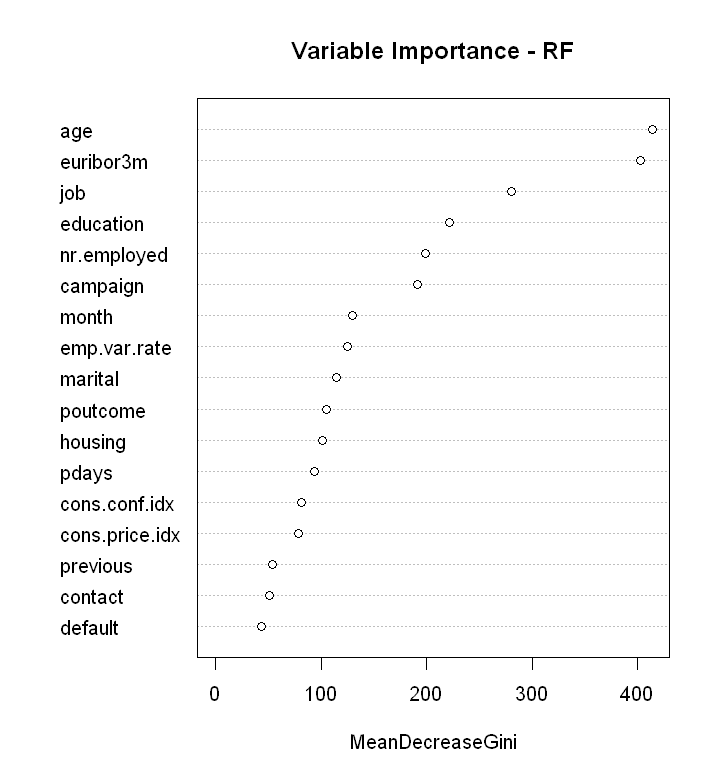

In [159]:
# Plotting feature importance

options(repr.plot.width=6, repr.plot.height=6.5)
varImpPlot(randomforestmodel, type=2, main='Variable Importance - RF')

In [160]:
# Predictions

RF_prediction = predict(randomforestmodel, newdata = test_data, type = "class")

In [161]:
# Evaluation 

confusionMatrix(RF_prediction, test_data$subscribe)

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 3428  306
         1  117  148
                                          
               Accuracy : 0.8942          
                 95% CI : (0.8843, 0.9036)
    No Information Rate : 0.8865          
    P-Value [Acc > NIR] : 0.06312         
                                          
                  Kappa : 0.358           
                                          
 Mcnemar's Test P-Value : < 2e-16         
                                          
            Sensitivity : 0.9670          
            Specificity : 0.3260          
         Pos Pred Value : 0.9181          
         Neg Pred Value : 0.5585          
             Prevalence : 0.8865          
         Detection Rate : 0.8572          
   Detection Prevalence : 0.9337          
      Balanced Accuracy : 0.6465          
                                          
       'Positive' Class : 0               
                        

In [162]:
# AUC 

#To get AUC i need probability so i change type to "prob"

RF_predictions = predict(randomforestmodel, newdata = test_data, type = "prob")

# keeping only probability of the second column, corresponding to the '1'

RF_predictions = RF_predictions[,2]

In [163]:
# Printing AUC
print(paste0('AUC = ', pROC::auc(pROC::roc(test_data$subscribe, RF_predictions))))

Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC = 0.752997645129021"


In [164]:
# Using K-fold cross validation

folds = createFolds(y = train_data$subscribe, k = 10)

RF_crossvalidation = lapply(folds, function(var){
  train_fold = train_data[-var, ]
  test_fold = train_data[var, ]
  
  RF_classify = randomForest(formula = subscribe ~., 
                               data = train_fold, ntree = 20)
  RF_prediction_folds = predict(RF_classify, newdata = test_fold, type = "class")
  
  randomforest_folds = confusionMatrix(RF_prediction_folds, test_fold$subscribe)
  accuracy = randomforest_folds$overall[1]
  
  return(accuracy)
})

In [165]:
# Checking the accuracy after k-fold cross validation

mean(as.numeric(RF_crossvalidation))

[1] 0.8921314

### Making prediction


### 2. Decision Tree

### 3. Logistic Regression

In [166]:
# Build Logistic Model
logreg <- glm(subscribe ~ ., family = "binomial", data = train_data)

summary(logreg)


Call:
glm(formula = subscribe ~ ., family = "binomial", data = train_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1496  -0.3997  -0.3288  -0.2681   2.9717  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -18.461316  25.854079  -0.714 0.475191    
age              0.005636   0.003368   1.674 0.094214 .  
job1             0.012426   0.280334   0.044 0.964644    
job10           -0.134831   0.273997  -0.492 0.622655    
job11            0.072477   0.245043   0.296 0.767403    
job2             0.319053   0.267552   1.192 0.233070    
job3             0.179062   0.255560   0.701 0.483512    
job4            -0.179964   0.234760  -0.767 0.443329    
job5            -0.047519   0.290058  -0.164 0.869868    
job6             0.019327   0.234391   0.082 0.934283    
job7            -0.076891   0.267104  -0.288 0.773448    
job8            -0.134340   0.244403  -0.550 0.582548    
job9            -0.005203   0.228860  -0.

In [167]:
# Predictions
LR_prediction <- predict(logreg, newdata = test_data, type = "response")

#lr_pred <- rep(0, length(test_data))
#lr_pred[LR_prediction > .5] <- 1
lr_pred <- ifelse(LR_prediction > 0.5, 1, 0)
lr_pred <- factor(lr_pred, levels=c(0, 1))

# confusion Matrix 
confusionMatrix(lr_pred, test_data$subscribe, mode = "everything", positive="1")

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 3491  345
         1   54  109
                                          
               Accuracy : 0.9002          
                 95% CI : (0.8905, 0.9093)
    No Information Rate : 0.8865          
    P-Value [Acc > NIR] : 0.002889        
                                          
                  Kappa : 0.3121          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.24009         
            Specificity : 0.98477         
         Pos Pred Value : 0.66871         
         Neg Pred Value : 0.91006         
              Precision : 0.66871         
                 Recall : 0.24009         
                     F1 : 0.35332         
             Prevalence : 0.11353         
         Detection Rate : 0.02726         
   Detection Prevalence : 0.04076         
      Balanced Accuracy 

In [168]:
# Printing AUC
print(paste0('AUC = ', pROC::auc(pROC::roc(test_data$subscribe, LR_prediction))))

Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC = 0.801133320492348"


### 4. LDA or Others ...

## Cleaning the Test Data 
We clean the test data with the same process as the train data before sending our final submission

In [169]:
# Checking number of observations
count(test)

n
<int>
10000


In [195]:
# Checking length: we have the same variables except 'subscribe'
length(test)

[1] 20

In [196]:
# Sum of missing values in test bank marketing data set
sum(is.na(test))

[1] 1975

In [197]:
# Missing values per variable in test
missing_values <- sapply(test, function(x) sum(is.na(x)))
missing_values

client_id            age            job        marital      education 
             0            105            111             95             97 
       default        housing           loan        contact          month 
           124            103            109             87            120 
   day_of_week       campaign          pdays       previous       poutcome 
           106             88            100            105            105 
  emp.var.rate cons.price.idx  cons.conf.idx      euribor3m    nr.employed 
           105            101            104             88            122


As in train cleaning we will keep and replace our missing values: 

- With a new category 'other' for categorical data unless this category already exists
- With a new category 'other' for logical data (as missing data represents less than 5% of observations)
- With the median or mean for numerical values

We will need to create indicators variable for numerical to track the missing data as it can be correlated to our target as well.


 #### 1. Categorical data 
It represents job, marital status, education, contact, month, day_of_week and poutcome

In [198]:
# Replacing NA for categorical data

# NA for job: As an 'unknown' category already exists then we replace the missing value with it
test$job = test$job %>% replace_na('unknown')

# NA for marital status: As an 'unknown' category already exists then we replace the missing value with it
test$marital = test$marital %>% replace_na('unknown')

# NA for education: As an 'unknown' category already exists then we replace the missing value with it
test$education = test$education %>% replace_na('unknown')

# NA for contact: As 'unknown' category doesn't exist yet we create it
test$contact = test$contact %>% replace_na('unknown')

# NA for month: As 'unknown' category doesn't exist yet we create it
test$month = test$month %>% replace_na('unknown')

# NA for day_of_week: As 'unknown' category doesn't exist yet we create it
test$day_of_week = test$day_of_week %>% replace_na('unknown')

# NA for poutcome: As an 'nonexistent' category already exists then we replace the missing value with it
test$poutcome = test$poutcome %>% replace_na('nonexistent')

#### 2. Logical data
It represents default, housing and loan

In [199]:
# Dealing with NA for logical data

# NA for default: As an 'unknown' category already exists then we replace the missing value with it
test$default = test$default %>% replace_na('unknown')

# NA for housing: As an 'unknown' category already exists then we replace the missing value with it
test$housing= test$housing %>% replace_na('unknown')

# NA for loan: As an 'unknown' category already exists then we replace the missing value with it
test$loan = test$loan %>% replace_na('unknown')



#### 3. Numerical data 

*For numerical data we need to create indicators to track the imputation*

- age will be replaced by the median
- campaign: the higher the better, it is not categorical
- Pdays: replacing 999 by zero and creating a new variable (or checking how many zeros first)
- previous: replacing by the median
- emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed will be replaced by the mean

In [200]:
# We will replace age by the median
# -> we can also create categorical variable for the age depending of our model result

# First step: creating a new variable 
test$missing_age <- ifelse(is.na(test$age) == TRUE, 1, 0)

# Second step: replacing by the median
test$age[is.na(test$age)]<-mean(test$age,na.rm=TRUE)

In [201]:
# For campaign variable

# We create a new 'campaign_missing' variable: 1 for missing and 0 otherwise
test$missing_campaign <- ifelse(is.na(test$campaign) == TRUE, 1, 0)

# We will replace campaign missing value by the median 
test$campaign[is.na(test$campaign)]<-mean(test$campaign,na.rm=TRUE)

In [202]:
# Checking if it was correctly assign 
#checkingmissing = test[,c('campaign','missing_campaign')]
#checkingmissing[order(checkingmissing$campaign),]

In [203]:
# Checking how many people with 0. 
#We do not have a lot of data in zero, we can assign a 1 instead of 0 for these clients
# -> We can also assign categorical variable instead of numerical later on
as.data.frame(table(test$pdays))

Var1,Freq
<fct>,<int>
0,2
1,5
2,13
3,122
4,34
5,13
6,85
7,16
8,3


In [204]:
# For pdays variable

# First we replace pdays 0 values with 1 (the difference in days for 0 and 1 is not huge)
test["pdays"][test["pdays"] == 0] <- 1

# We create a new indicator variable for '999' to track the replacement
test$replace999 <- ifelse(test$pdays == 999, 1, 0)
test$replace999 <- ifelse(is.na(test$replace999) == TRUE, 1, 0)

# We replace pdays 999 values with zero (So the zero is more significant for people without contact)
test["pdays"][test["pdays"] == 999] <- 0

# We track the NA values as a new variable
test$missing_pdays <- ifelse(is.na(test$pdays) == TRUE, 1, 0)

# We can finally replace the NA values by zero 
test$pdays = test$pdays %>% replace_na(0)

In [205]:
test

client_id,age,job,marital,education,default,housing,loan,contact,month,⋯,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,missing_age,missing_campaign,replace999,missing_pdays
<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2986,53.00000,technician,single,professional.course,no,no,no,cellular,jul,⋯,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0,0,0,0
29710,32.00000,blue-collar,married,basic.6y,no,yes,no,telephone,jul,⋯,nonexistent,1.4,93.918,-42.7,4.963,5228.1,0,0,0,0
38938,70.00000,retired,married,high.school,no,yes,no,cellular,aug,⋯,nonexistent,-2.9,92.201,-31.4,0.883,5076.2,0,0,0,0
31313,46.00000,services,married,high.school,no,no,no,cellular,apr,⋯,failure,-1.8,93.075,-47.1,1.405,5099.1,0,0,0,0
24173,35.00000,technician,single,unknown,no,no,no,cellular,may,⋯,failure,-1.8,92.893,-46.2,1.266,5099.1,0,0,0,0
14426,24.00000,student,single,high.school,no,yes,no,cellular,may,⋯,success,-1.8,93.876,-40.0,0.668,5008.7,0,0,0,0
40159,33.00000,admin.,divorced,high.school,no,no,no,telephone,apr,⋯,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0,0,0,0
12301,38.00000,admin.,married,high.school,no,yes,no,telephone,jul,⋯,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0,0,0,0
9640,37.00000,blue-collar,single,basic.9y,unknown,no,no,telephone,may,⋯,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0,0,0,0


In [206]:
# For previous variable

# We count the unique values frequency first
as.data.frame(table(test$previous))

Var1,Freq
<fct>,<int>
0,8511
1,1115
2,188
3,51
4,23
5,4
6,2
7,1


In [207]:
# We can either replace missing values by the median + tracking missing or creating categorical variables with a new category
# -> We will first try by assigning the median and tracking the missing data, we can improve this later for the modelling

# First step: new variable 
test$missing_previous <- ifelse(is.na(test$previous) == TRUE, 1, 0)

# Second step: replacing NA
test$previous[is.na(test$previous)]<-median(test$previous,na.rm=TRUE)

In [208]:
# Finally, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed will be replaced by the mean

# First step: new variables 
test$missing_emp.var.rate <- ifelse(is.na(test$emp.var.rate) == TRUE, 1, 0)
test$missing_cons.price.idx <- ifelse(is.na(test$cons.price.idx) == TRUE, 1, 0)
test$missing_cons.conf.idx <- ifelse(is.na(test$cons.conf.idx) == TRUE, 1, 0)
test$missing_euribor3m <- ifelse(is.na(test$euribor3m) == TRUE, 1, 0)
test$missing_nr.employed <- ifelse(is.na(test$nr.employed) == TRUE, 1, 0)

# Second step: replacing NA
test$emp.var.rate[is.na(test$emp.var.rate)]<-mean(test$emp.var.rate,na.rm=TRUE)
test$cons.price.idx[is.na(test$cons.price.idx)]<-mean(test$cons.price.idx,na.rm=TRUE)
test$cons.conf.idx[is.na(test$cons.conf.idx)]<-mean(test$cons.conf.idx,na.rm=TRUE)
test$euribor3m[is.na(test$euribor3m)]<-mean(test$euribor3m,na.rm=TRUE)
test$nr.employed[is.na(test$nr.employed)]<-mean(test$nr.employed,na.rm=TRUE)

In [209]:
# Checking missing values per variables in test
missing_values <- sapply(test, function(x) sum(is.na(x)))
missing_values

client_id                    age                    job 
                     0                      0                      0 
               marital              education                default 
                     0                      0                      0 
               housing                   loan                contact 
                     0                      0                      0 
                 month            day_of_week               campaign 
                     0                      0                      0 
                 pdays               previous               poutcome 
                     0                      0                      0 
          emp.var.rate         cons.price.idx          cons.conf.idx 
                     0                      0                      0 
             euribor3m            nr.employed            missing_age 
                     0                      0                      0 
      missing_campaign             replace999          missing_pdays 
                     0                      0                      0 
      missing_previous   missing_emp.var.rate missing_cons.price.idx 
                     0                      0                      0 
 missing_cons.conf.idx      missing_euribor3m    missing_nr.employed 
                     0                      0                      0

In [210]:
# See final test table 

str(test)

'data.frame':	10000 obs. of  30 variables:
 $ client_id             : int  2986 29710 38938 31313 24173 14426 40159 12301 9640 19742 ...
 $ age                   : num  53 32 70 46 35 24 33 38 37 36 ...
 $ job                   : chr  "technician" "blue-collar" "retired" "services" ...
 $ marital               : chr  "single" "married" "married" "married" ...
 $ education             : chr  "professional.course" "basic.6y" "high.school" "high.school" ...
 $ default               : chr  "no" "no" "no" "no" ...
 $ housing               : chr  "no" "yes" "yes" "no" ...
 $ loan                  : chr  "no" "no" "no" "no" ...
 $ contact               : chr  "cellular" "telephone" "cellular" "cellular" ...
 $ month                 : chr  "jul" "jul" "aug" "apr" ...
 $ day_of_week           : chr  "tue" "wed" "tue" "mon" ...
 $ campaign              : num  1 2 1 1 1 2 3 18 5 1 ...
 $ pdays                 : num  0 0 0 0 0 6 0 0 0 3 ...
 $ previous              : int  0 0 0 1 1 2 0 0 0 1 ...
 

In [211]:
# From the correlation in train set we decided to remove some variables not correlated to our target. We will also delete them for our test set. It was day, loan and trackers variables

test = subset(test, select=-c(client_id, loan, day_of_week, missing_age, missing_campaign, replace999, missing_pdays, missing_previous, missing_emp.var.rate, missing_cons.price.idx, missing_cons.conf.idx, missing_euribor3m , missing_nr.employed))


### Last steps before Modeling Test

In [212]:
str(test)

'data.frame':	10000 obs. of  17 variables:
 $ age           : num  53 32 70 46 35 24 33 38 37 36 ...
 $ job           : chr  "technician" "blue-collar" "retired" "services" ...
 $ marital       : chr  "single" "married" "married" "married" ...
 $ education     : chr  "professional.course" "basic.6y" "high.school" "high.school" ...
 $ default       : chr  "no" "no" "no" "no" ...
 $ housing       : chr  "no" "yes" "yes" "no" ...
 $ contact       : chr  "cellular" "telephone" "cellular" "cellular" ...
 $ month         : chr  "jul" "jul" "aug" "apr" ...
 $ campaign      : num  1 2 1 1 1 2 3 18 5 1 ...
 $ pdays         : num  0 0 0 0 0 6 0 0 0 3 ...
 $ previous      : int  0 0 0 1 1 2 0 0 0 1 ...
 $ poutcome      : chr  "nonexistent" "nonexistent" "nonexistent" "failure" ...
 $ emp.var.rate  : num  1.4 1.4 -2.9 -1.8 -1.8 -1.8 -1.8 1.4 1.1 -2.9 ...
 $ cons.price.idx: num  93.9 93.9 92.2 93.1 92.9 ...
 $ cons.conf.idx : num  -42.7 -42.7 -31.4 -47.1 -46.2 -40 -47.1 -42.7 -36.4 -40.8 ...
 $ eur


#### 1. Replacing categorical string by numerical category


These variables are job, marital, education, default, housing, contact, month and poutcome 

In [213]:
# Jobs

# Replacing job category in numerical category

test["job"][test["job"] == "management"] <- 11
test["job"][test["job"] == "entrepreneur"] <- 10
test["job"][test["job"] == "admin."] <- 9
test["job"][test["job"] == "services"] <- 8
test["job"][test["job"] == "self-employed"] <- 7
test["job"][test["job"] == "technician"] <- 6
test["job"][test["job"] == "housemaid"] <- 5
test["job"][test["job"] == "blue-collar"] <- 4
test["job"][test["job"] == "retired"] <- 3
test["job"][test["job"] == "student"] <- 2
test["job"][test["job"] == "unemployed"] <- 1
test["job"][test["job"] == "unknown"] <- 0

# Checking for unique value 
unique(test$job)

[1] "6"  "4"  "3"  "8"  "2"  "9"  "11" "7"  "10" "1"  "5"  "0"

In [214]:
# Marital

# Replacing with numerical category
test["marital"][test["marital"] == "married"] <- 3
test["marital"][test["marital"] == "divorced"] <- 2
test["marital"][test["marital"] == "single"] <- 1
test["marital"][test["marital"] == "unknown"] <- 0

# Checking for unique value 
unique(test$marital)

[1] "1" "3" "2" "0"

In [215]:
# Education

# Replacing with numerical category
test["education"][test["education"] == "professional.course"] <- 7
test["education"][test["education"] == "university.degree"] <- 6
test["education"][test["education"] == "high.school"] <- 5
test["education"][test["education"] == "basic.9y"] <- 4
test["education"][test["education"] == "basic.6y"] <- 3
test["education"][test["education"] == "basic.4y"] <- 2
test["education"][test["education"] == "illiterate"] <- 1
test["education"][test["education"] == "unknown"] <- 0

# Checking for unique value 
unique(test$education)

[1] "7" "3" "5" "0" "4" "6" "2" "1"

In [216]:
unique(test$default)

[1] "no"      "unknown"

In [217]:
# Default

# Replacing with numerical category
test["default"][test["default"] == "yes"] <- 2
test["default"][test["default"] == "no"] <- 1
test["default"][test["default"] == "unknown"] <- 0
levels(test$default) <- levels(train_data$default)
# Checking for unique value 
unique(test$default)

[1] "1" "0"

In [218]:
# Housing

# Replacing with numerical category
test["housing"][test["housing"] == "yes"] <- 2
test["housing"][test["housing"] == "no"] <- 1
test["housing"][test["housing"] == "unknown"] <- 0

# Checking for unique value 
unique(test$housing)

[1] "1" "2" "0"

In [219]:
# Contact

# Replacing with numerical category
test["contact"][test["contact"] == "cellular"] <- 2
test["contact"][test["contact"] == "telephone"] <- 1
test["contact"][test["contact"] == "unknown"] <- 0

# Checking for unique value 
unique(test$contact)

[1] "2" "1" "0"

In [220]:
# Month

# Replacing with numerical category
test["month"][test["month"] == "dec"] <- 10
test["month"][test["month"] == "nov"] <- 9
test["month"][test["month"] == "oct"] <- 8
test["month"][test["month"] == "sep"] <- 7
test["month"][test["month"] == "aug"] <- 6
test["month"][test["month"] == "jul"] <- 5
test["month"][test["month"] == "jun"] <- 4
test["month"][test["month"] == "may"] <- 3
test["month"][test["month"] == "apr"] <- 2
test["month"][test["month"] == "mar"] <- 1
test["month"][test["month"] == "unknown"] <- 0

# Checking for unique value 
unique(test$month)

[1] "5"  "6"  "2"  "3"  "4"  "8"  "9"  "0"  "1"  "10" "7"

In [221]:
# Poutcome

# Replacing with numerical category
test["poutcome"][test["poutcome"] == "success"] <- 2
test["poutcome"][test["poutcome"] == "failure"] <- 1
test["poutcome"][test["poutcome"] == "nonexistent"] <- 0

# Checking for unique value 
unique(test$poutcome)

[1] "0" "1" "2"


##### 2. Factorization

In [222]:
# Creating factors for our categorical data 
test$job = as.factor(test$job)
test$marital = as.factor(test$marital)
test$education = as.factor(test$education)
test$contact = as.factor(test$contact)
test$month = as.factor(test$month)
test$poutcome = as.factor(test$poutcome)


# Creating factors for our logical data 
test$default = as.factor(test$default)
test$housing = as.factor(test$housing)

In [227]:
names(train_data)==names(test)

Warning message in names(train_data) == names(test):
"longer object length is not a multiple of shorter object length"


[1]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[13]  TRUE  TRUE  TRUE  TRUE  TRUE FALSE

In [229]:
levels(test$default) <- levels(train_data$default)

In [232]:
str(test)

'data.frame':	10000 obs. of  17 variables:
 $ age           : num  53 32 70 46 35 24 33 38 37 36 ...
 $ job           : Factor w/ 12 levels "0","1","10","11",..: 9 7 6 11 9 5 12 12 7 9 ...
 $ marital       : Factor w/ 4 levels "0","1","2","3": 2 4 4 4 2 2 3 4 2 4 ...
 $ education     : Factor w/ 8 levels "0","1","2","3",..: 8 4 6 6 1 6 6 6 5 7 ...
 $ default       : Factor w/ 3 levels "0","1","2": 2 2 2 2 2 2 2 2 1 2 ...
 $ housing       : Factor w/ 3 levels "0","1","2": 2 3 3 2 2 3 2 3 2 2 ...
 $ contact       : Factor w/ 3 levels "0","1","2": 3 2 3 3 3 3 2 2 2 3 ...
 $ month         : Factor w/ 11 levels "0","1","10","2",..: 7 7 8 4 5 5 4 7 5 6 ...
 $ campaign      : num  1 2 1 1 1 2 3 18 5 1 ...
 $ pdays         : num  0 0 0 0 0 6 0 0 0 3 ...
 $ previous      : int  0 0 0 1 1 2 0 0 0 1 ...
 $ poutcome      : Factor w/ 3 levels "0","1","2": 1 1 1 2 2 3 1 1 1 3 ...
 $ emp.var.rate  : num  1.4 1.4 -2.9 -1.8 -1.8 -1.8 -1.8 1.4 1.1 -2.9 ...
 $ cons.price.idx: num  93.9 93.9 92.2 93.1 92.

### Creating the 'subscribe' target variable and assigning prediction to it

We will use our best algorithm in terms of AUC and accuracy from the train table models

In [267]:
# Fitting the random forest to our training set

randomforestmodel = randomForest(formula = subscribe ~., 
                           data = train, ntree = 10)

summary(randomforestmodel)

                Length Class  Mode     
call                4  -none- call     
type                1  -none- character
predicted       20000  factor numeric  
err.rate           30  -none- numeric  
confusion           6  -none- numeric  
votes           40000  matrix numeric  
oob.times       20000  -none- numeric  
classes             2  -none- character
importance         17  -none- numeric  
importanceSD        0  -none- NULL     
localImportance     0  -none- NULL     
proximity           0  -none- NULL     
ntree               1  -none- numeric  
mtry                1  -none- numeric  
forest             14  -none- list     
y               20000  factor numeric  
test                0  -none- NULL     
inbag               0  -none- NULL     
terms               3  terms  call     

In [238]:
test_client <- read.csv("../Data/bank_mkt_test.csv")
test_client<-data.frame(test_client$client_id)


In [268]:

FP<-predict(randomforestmodel, newdata = test, type = "class")
FP<-data.frame(FP)


In [269]:
Final<-NULL
Final$client_id<-test_client
Final$subscribe<-FP$FP
Final<-data.frame(Final)
Final<-Final%>%rename(client_id=1)
fwrite(Final,'../Data/third_try.csv')

In [255]:
str(FP)

'data.frame':	10000 obs. of  1 variable:
 $ FP: Factor w/ 2 levels "0","1": 1 1 1 1 1 2 1 1 1 1 ...
